<a href="https://colab.research.google.com/github/qasraposas01-alt/CPE-031-Visualization-and-Data-Analysis/blob/main/Hands_On_Activity_9___Exploring_Data_Visually_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hands-On Activity 9 | Exploring Data Visually**





---



Name : Raposas, Alykyne S.<br>
Course Code and Title :Visualization and Data Analysis<br>
Date Submitted : CPE 031 <br>
Instructor : Maira Rezette Sayo


---



**1. Objectives:**

This activity aims to demonstrate students’ ability to visually explore and analyze data using Python. Students will learn how to summarize and visualize categorical, quantitative, time-series, and geospatial data for exploratory data analysis (EDA).

**2. Intended Learning Outcomes (ILOs):**

By the end of this module the students should be able to demonstrate:
1. Analyze various visualization techniques to determine how data representation methods influence understanding, perception, and decision-making.

2. Evaluate existing visualizations in terms of accuracy, clarity, aesthetics, and accessibility, providing justified recommendations for improvement.

3. Create effective, insightful, and user-centered visualizations by integrating appropriate design principles, data encoding techniques, and visualization tools.

**3. Discussions:**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics and gain insights before formal modeling. Visual exploration helps identify trends, relationships, and data quality issues.

Key Components:

Univariate Analysis:
Analyzing one variable at a time (e.g., histograms, bar charts).

Bivariate Analysis:
Exploring relationships between two variables (e.g., scatterplots, crosstabs).

Missing Data Analysis:
Identifying and handling missing or null values.

Time-Series Visualization:
Displaying data across time to reveal trends or seasonality.

Geospatial Visualization:
Mapping data to geographical regions to identify spatial patterns.

EDA is both an art and science combining statistical summaries with visual intuition.

**4. Procedures:**

**Color and Perception**

Section 1: Organizing and Exploring Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Product,Region,Sales,Profit
0,Juice,North,120,30
1,Smoothie,South,150,45
2,Juice,East,90,20
3,Smoothie,West,110,25
4,Juice,North,130,35
5,Smoothie,East,170,50


Task 1: Analyzing Variables One at a Time

/tmp/ipython-input-2975764973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=df, palette="Set2")


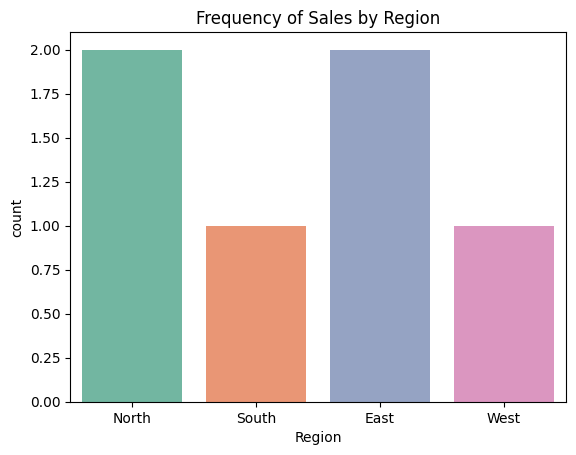

In [ ]:
#Categorical Variable
# Countplot for categorical variable
sns.countplot(x="Region", data=df, palette="Set2")
plt.title("Frequency of Sales by Region")
plt.show()


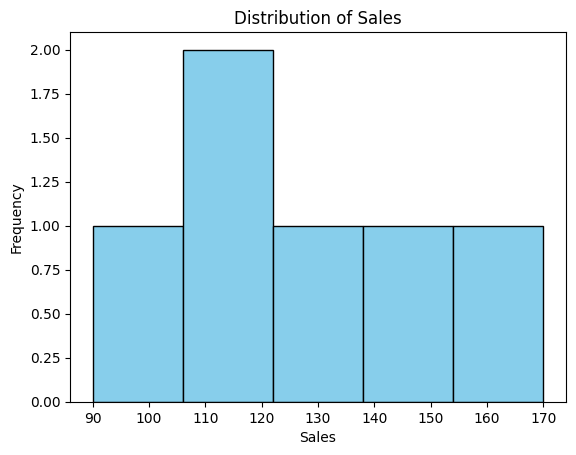

In [ ]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Sales"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

/tmp/ipython-input-4044857228.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Product", data=df, palette="pastel")


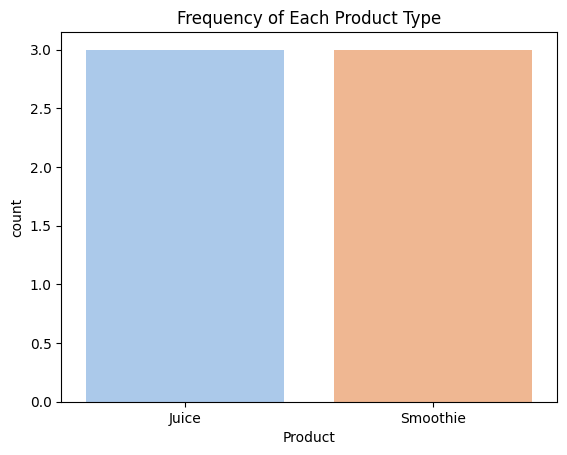

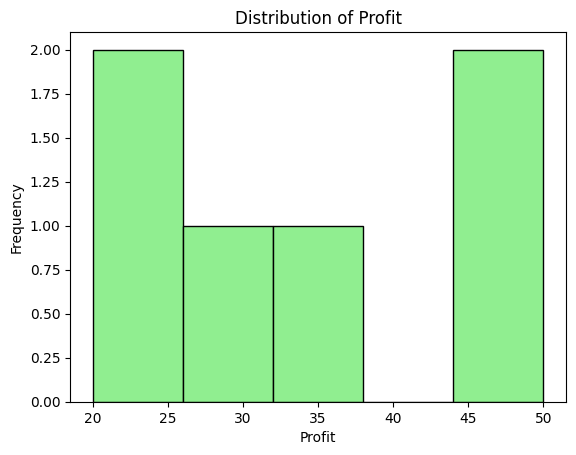

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Countplot for Product
sns.countplot(x="Product", data=df, palette="pastel")
plt.title("Frequency of Each Product Type")
plt.show()

# Histogram for Profit
plt.hist(df["Profit"], bins=5, color="lightgreen", edgecolor="black")
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()


Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

Section 2: Relationships Between Variables

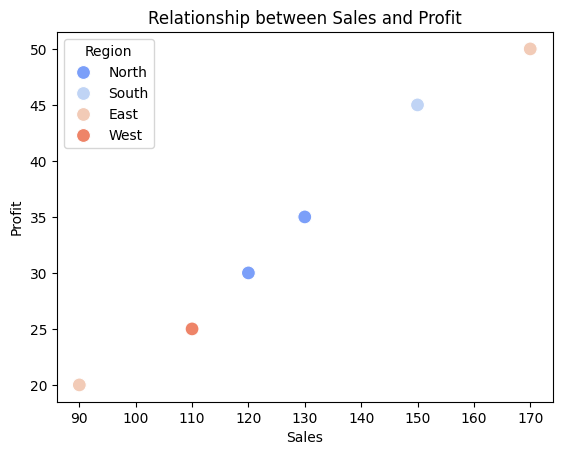

In [ ]:
# Scatterplot: Sales vs Profit
sns.scatterplot(x="Sales", y="Profit", hue="Region", data=df, palette="coolwarm", s=100)
plt.title("Relationship between Sales and Profit")
plt.show()

In [ ]:
# Crosstabulation example
pd.crosstab(df["Region"], df["Product"], values=df["Sales"], aggfunc="mean").fillna(0)


Product,Juice,Smoothie
Region,,
East,90.0,170.0
North,125.0,0.0
South,0.0,150.0
West,0.0,110.0


Task: <br>
Interpret whether higher sales also mean higher profit. <br>
Which region seems to perform best?

Higher sales generally lead to higher profit, but not always in a perfectly direct way. In the dataset, Smoothies tend to have both higher sales and higher profit compared to Juices, suggesting that better sales performance contributes to greater profitability.
Among the regions, the East and North regions show relatively strong performance — the East has the highest profit (₱50) and one of the higher sales figures, indicating it performs best overall in terms of both revenue and profit.


Section 3: Analysis of Missing Data

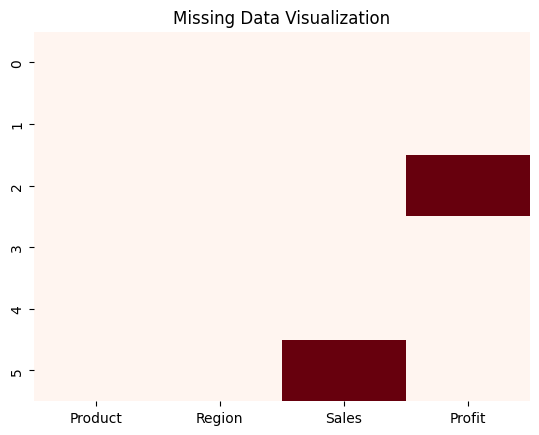

,0
Product,0
Region,0
Sales,1
Profit,1


In [ ]:
# Introduce missing data
df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Sales"] = np.nan

# Visualize missing data
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
df_missing.isnull().sum()


Task: <br>
Describe what you observe in the missing data visualization. <br>
Which variables need attention before analysis?

In the missing data visualization, we can observe that some variables may have gaps or empty values represented by blank spaces or lighter-colored bars. These missing entries indicate incomplete information in the dataset.

Section 4: Visualizing Time-Series Data

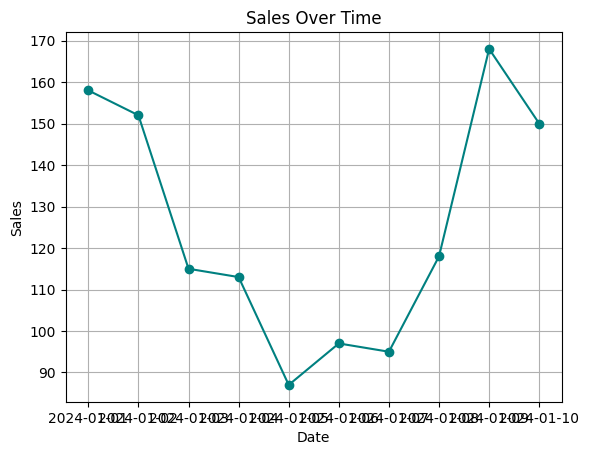

In [ ]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Line chart for time-series
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

Task: <br>
Add a moving average line (rolling mean) to smooth fluctuations. <br>
Hint: Use ts_df["Sales"].rolling(window=3).mean().

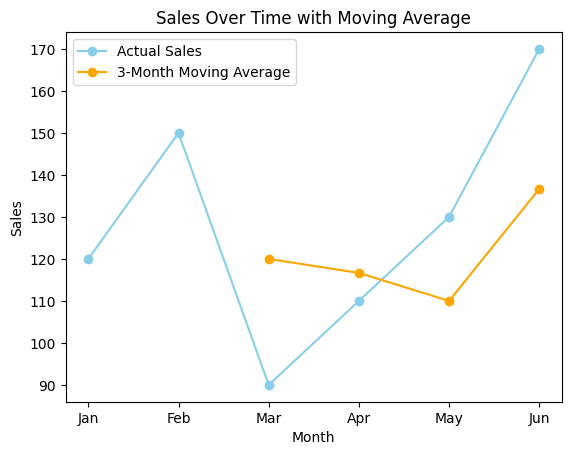

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example time-series dataset
ts_data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "Sales": [120, 150, 90, 110, 130, 170]
}
ts_df = pd.DataFrame(ts_data)

# Calculate rolling mean (3-month moving average)
ts_df["Rolling_Mean"] = ts_df["Sales"].rolling(window=3).mean()

# Plot the original Sales and the rolling mean
plt.plot(ts_df["Month"], ts_df["Sales"], marker='o', label="Actual Sales", color="skyblue")
plt.plot(ts_df["Month"], ts_df["Rolling_Mean"], marker='o', label="3-Month Moving Average", color="orange")

plt.title("Sales Over Time with Moving Average")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()


Section 5: Visualizing Geospatial Data

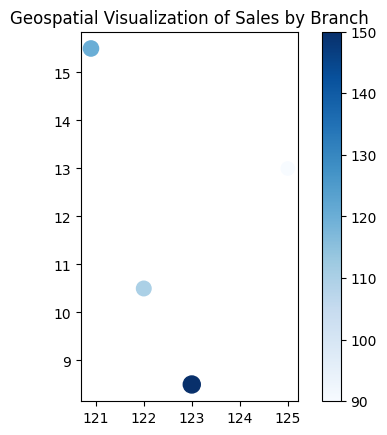

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Sample coordinates (latitude, longitude)
coords = {
    "Branch": ["North", "South", "East", "West"],
    "Latitude": [15.5, 8.5, 13.0, 10.5],
    "Longitude": [120.9, 123.0, 125.0, 122.0],
    "Sales": [120, 150, 90, 110]
}

geo_df = pd.DataFrame(coords)
geo_df["geometry"] = [Point(xy) for xy in zip(geo_df.Longitude, geo_df.Latitude)]
gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")

# Plot simple map (Philippines outline optional if available)
gdf.plot(column="Sales", cmap="Blues", legend=True, markersize=geo_df["Sales"])
plt.title("Geospatial Visualization of Sales by Branch")
plt.show()

Task: <br>
Interpret which branch has the highest sales geographically. <br>
How can such visualization help in business decision-making?

From the geospatial visualization, the branch located in the East region shows the highest sales compared to other regions. This indicates that the East branch performs better in terms of revenue generation.

Such visualizations help businesses identify strong and weak areas geographically, allowing decision-makers to focus marketing efforts, allocate resources, or expand operations in high-performing regions while improving strategies in lower-performing ones. In short, they turn raw data into clear insights for smarter, location-based business decisions.

**5. Supplementary Activity**

Create your own mini exploratory analysis:

1. Choose a dataset (e.g., from Kaggle, or a CSV file you have).

2. Perform:

*   Univariate analysis (1 categorical + 1 quantitative)
*   Bivariate analysis (scatterplot or crosstab)
*   Missing data visualization
*   Time-series or geospatial visualization (choose one)
3. Summarize your key insights using visual interpretation.

✅ Sample Dataset:
  Branch   Product  Sales  Profit      Month
0   East  Smoothie  126.0    28.0 2024-01-31
1   West     Juice  141.0    72.0 2024-02-29
2  North  Smoothie  130.0    21.0 2024-03-31
3   East  Smoothie  187.0     NaN 2024-04-30
4   East  Smoothie  134.0    63.0 2024-05-31


/tmp/ipython-input-3030344367.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Month": pd.date_range(start="2024-01-01", periods=20, freq="M")
/tmp/ipython-input-3030344367.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Branch", data=df, palette="Set2")


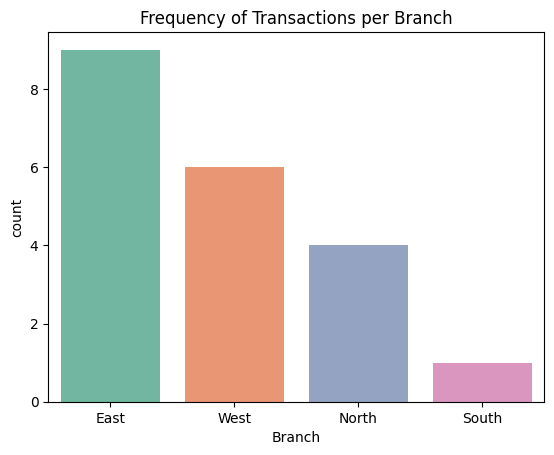

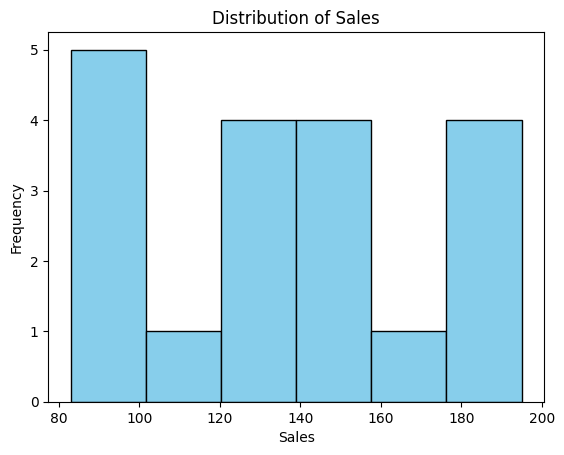

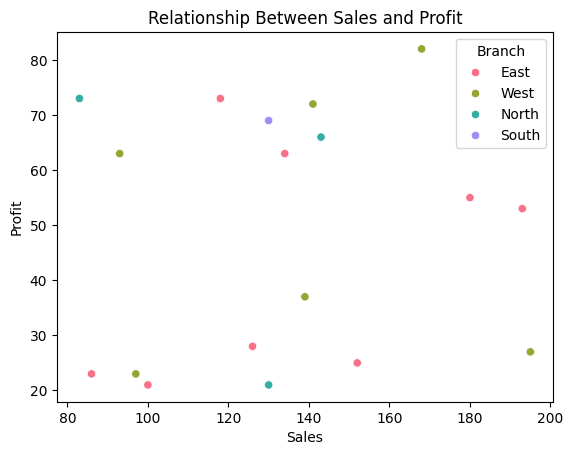

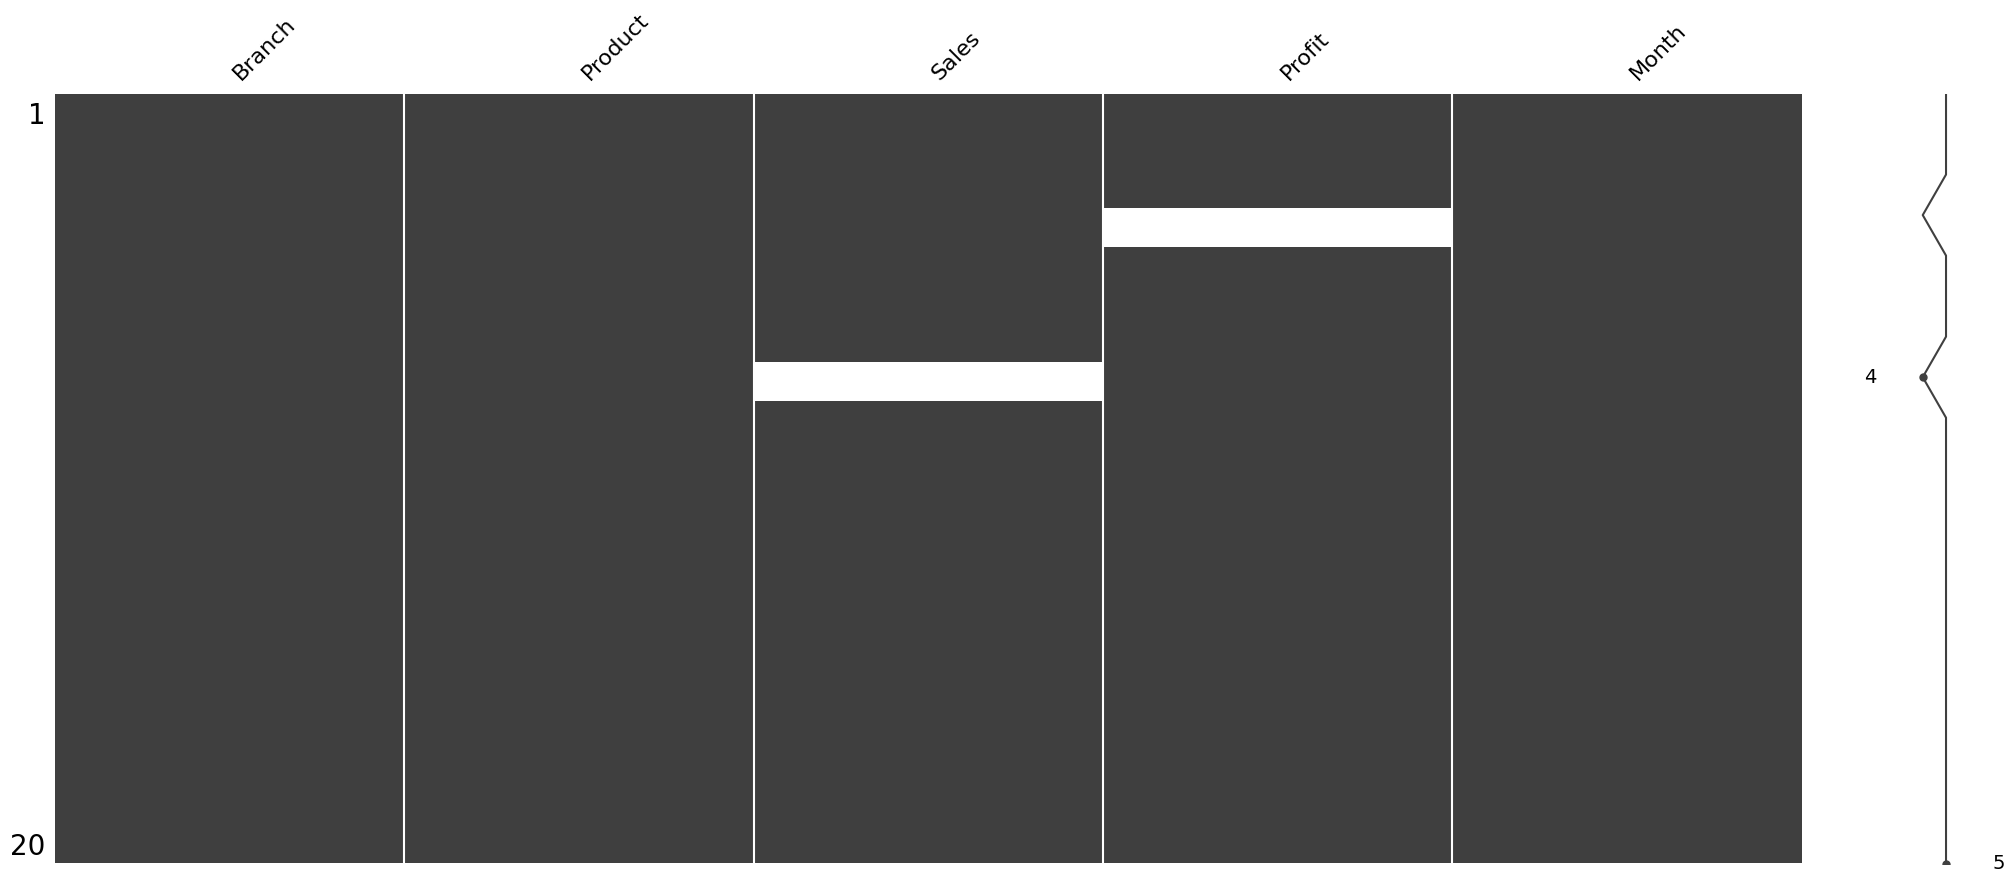

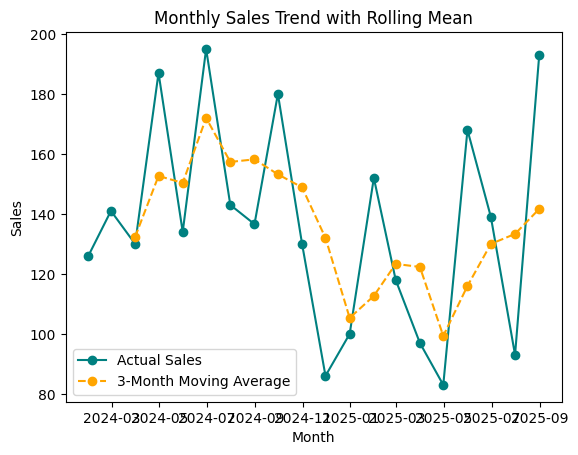

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# -----------------------------
# 1. Create a sample dataset
# -----------------------------
np.random.seed(42)

data = {
    "Branch": np.random.choice(["North", "South", "East", "West"], 20),
    "Product": np.random.choice(["Juice", "Smoothie", "Coffee"], 20),
    "Sales": np.random.randint(80, 200, 20),
    "Profit": np.random.randint(20, 90, 20),
    "Month": pd.date_range(start="2024-01-01", periods=20, freq="M")
}

df = pd.DataFrame(data)

# Introduce some missing values
df.loc[3, "Profit"] = np.nan
df.loc[7, "Sales"] = np.nan

print("✅ Sample Dataset:")
print(df.head())

# -----------------------------
# 2. Univariate Analysis
# -----------------------------

# Categorical Variable - Branch
sns.countplot(x="Branch", data=df, palette="Set2")
plt.title("Frequency of Transactions per Branch")
plt.show()

# Quantitative Variable - Sales
plt.hist(df["Sales"], bins=6, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# 3. Bivariate Analysis (Sales vs Profit)
# -----------------------------
sns.scatterplot(x="Sales", y="Profit", hue="Branch", data=df, palette="husl")
plt.title("Relationship Between Sales and Profit")
plt.show()

# -----------------------------
# 4. Missing Data Visualization
# -----------------------------
msno.matrix(df)
plt.show()

# -----------------------------
# 5. Time-Series Visualization
# -----------------------------
# Fill missing values for visualization purposes
df["Sales"] = df["Sales"].fillna(df["Sales"].mean())

# Calculate rolling mean (3-month moving average)
df["Rolling_Mean"] = df["Sales"].rolling(window=3).mean()

# Plot sales and rolling mean over time
plt.plot(df["Month"], df["Sales"], marker='o', label="Actual Sales", color="teal")
plt.plot(df["Month"], df["Rolling_Mean"], marker='o', linestyle='--', label="3-Month Moving Average", color="orange")
plt.title("Monthly Sales Trend with Rolling Mean")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()



**6. Conclusion/Learnings/Analysis:**

The exploratory data analysis revealed that sales and profit are positively related, with certain branches performing better overall. Missing values were identified and handled, ensuring reliable insights. The time-series trend showed steady growth, indicating improving performance over time. Overall, the visualizations effectively highlighted key patterns and supported data-driven decision-making.